In [8]:
import dask
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da

In [9]:
def func(x):
    return 3 * x  - 1

def make_data(x):
    return 0.5 * (2 * np.random.random(x.shape) - 1) + func(x)

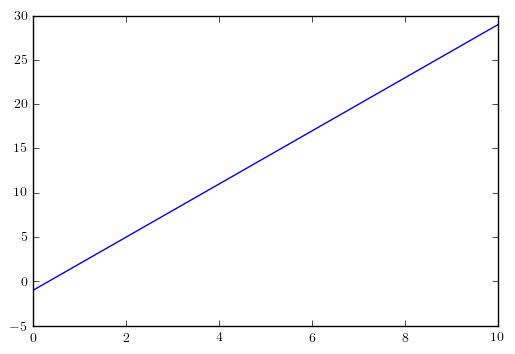

In [11]:
x = da.linspace(0, 10, 1000, chunks=10)
y = func(x)
plt.plot(x,y)
plt.show()

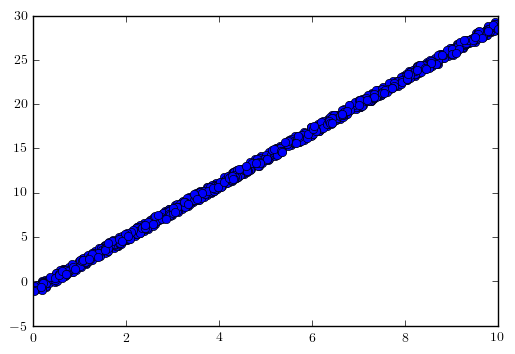

In [14]:
x_ = da.random.random(1000, chunks=10) * 10
y_ = make_data(x_)
plt.plot(x_, y_, 'o')
plt.show()

In [16]:
x__ = da.concatenate((x_[:,None], da.ones(1000, chunks=10)[:,None]), axis=-1)
print(x__)

dask.array<concatenate, shape=(1000, 2), dtype=float64, chunksize=(10, 1)>


In [20]:
print(x__.shape)
y__ = y_[:, None]
print(x__)
print(y__)

da.linalg.lstsq(x__, y__)[0]


(1000, 2)
dask.array<concatenate, shape=(1000, 2), dtype=float64, chunksize=(10, 1)>
dask.array<getitem, shape=(1000, 1), dtype=float64, chunksize=(10, 1)>


ValueError: Input must have the following properties:
  1. Have two dimensions
  2. Have only one column of blocks

In [7]:
import dask.array as da
x = np.arange(1000)
y = da.from_array(x, chunks=(100))
y.mean().compute()

499.5